# **_Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

Logistic Regression is a supervised machine-learning algorithm mostly used for data classification. Logistic Regression estimates the probability of an event belonging to a given class, given a data set of independent variables that help predict the result.
It is a regression model because it takes the output from the linear regression model and puts it in an activation function, i.e., a sigmoid function, which converts the result into a value between 0 and 1.


Test Accuracy: 0.73


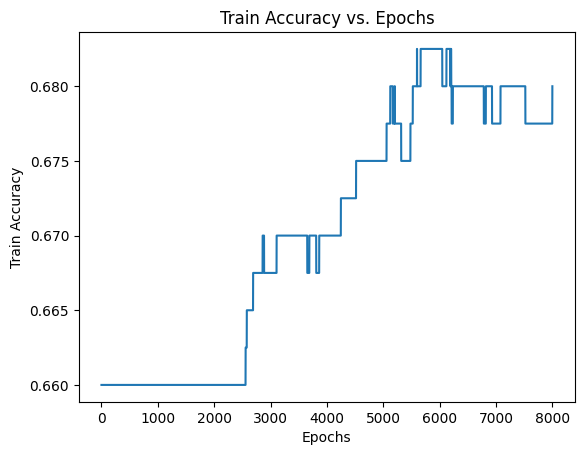

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(1000)

class LogisticRegression():
    def __init__(self, lr, num_iter):
        self.lr =lr
        self.num_iter =num_iter
        self.acc_history =[]
        self.weights =None
        self.bias =None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        num_samples,num_features =X.shape
        self.weights =np.zeros(num_features)
        self.bias =0
        for i in range(self.num_iter):
            lm = np.dot(X, self.weights) + self.bias
            preds = self.sigmoid(lm)
            # calculating gradients for weights and biases respectively
            dw = (1/num_samples)*np.dot(X.T,(preds-y))
            db = (1/num_samples)*np.sum(preds-y)
            # updating weights and biases using the gradients
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            # Calculate train_accuracies to store in history
            y_train_pred = self.predict(X)
            accuracy = accuracy_score(y, y_train_pred)
            self.acc_history.append(accuracy)

    def predict(self, X):
        lm = np.dot(X, self.weights) + self.bias
        preds = self.sigmoid(lm)
        # convert output of sigmoid into 1s and 0s
        return [1 if p >= 0.5 else 0 for p in preds]

# Loading data from CSV file
data = pd.read_csv('sampled_data.csv')

# Extract features and target
X = data.iloc[:, :8].to_numpy()  # get the features matrix
y = data.iloc[:, 8].to_numpy()   # get the target vector

# Hyperparameters
learning_rate = 0.000001
num_iterations = 8000

# split training and testing sets. train set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training the model and obtaining updated weights bias and training accuracies
model = LogisticRegression(lr=learning_rate, num_iter=num_iterations)
model.train(X_train, y_train)

# Calculating test accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy:", accuracy)

# Plot
plt.plot(range(num_iterations),model.acc_history)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Epochs')
plt.show()

## **_Least Squares Classification_**

Least Squares Classification is a type of machine learning algorithm that can be used to predict the probability of a data belonging to a particular class. It is commonly used for binary classification problems with either 0 or 1 results.

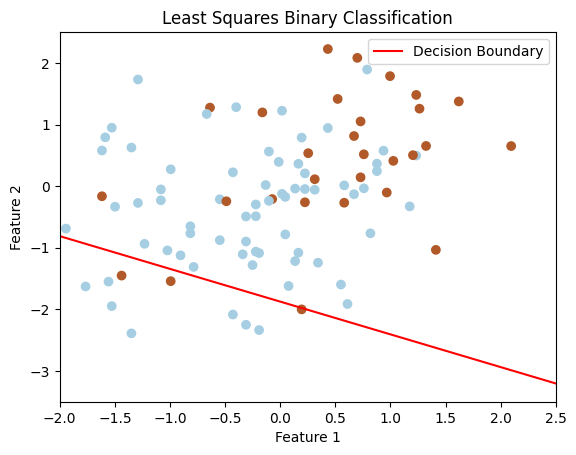

Test Accuracy: 0.86


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

SEED = 1000
# Hyperparameters
TEST_SPLIT = 0.2

np.random.seed(SEED)
data = pd.read_csv("sampled_data.csv")
y = data["Outcome"].values
y = y.reshape(-1, 1)
X = data.drop("Outcome", axis=1).values

# Normalization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_norm = (X - mean) / std

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=TEST_SPLIT)

# Adding biases
train_b = np.ones((X_train.shape[0], 1)) # bias term
test_b = np.ones((X_test.shape[0], 1)) # bias term
X_train_b = np.concatenate((train_b, X_train), axis=1) # added bias
X_test_b = np.concatenate((test_b, X_test), axis=1) # added bias

# Least squares classification
theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Plots
plt.scatter(X_test[:, 1], X_test[:, 5], c=y_test, cmap=plt.cm.Paired, marker='o')
# Plot the decision boundary
x_bound = np.array([-10, 10])
y_bound = -(theta[0] + theta[1] * x_bound) / theta[2] # decision boundary equation
plt.plot(x_bound, y_bound, '-r', label='Decision Boundary')

plt.xlim(left=-2, right=2.5)
plt.ylim(bottom=-3.5, top=2.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Least Squares Binary Classification')
plt.show()

# Predict on the testing data
y_pred = np.dot(X_test_b, theta)
y_pred = (y_pred > 0.5).astype(int) # Quantifying predictions
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: %.2f" % accuracy)

We have only drawn the graph between one of the two most dominant features. The decision boundary that we see here is not clearly dividing the points into two classes because we have 8 features that determine the target but since we can't project 8-D graph so we selected two features out of the 8 just to represent how the decision boundary interact with the points.

## **_Insights drawn (plots, markdown explanations)_**

# Logistic Regression
##Loss Function
We aim to find the best weight values associated with the model equation. For that, we initialize weights and bias with zero and then keep on updating the weights to minimize the loss function given by :

$$\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]$$

##Sigmoid Function
The sigmoid function tells us the probability that some input data point x belongs to class A. For example let’s take all probabilities ≥ 0.5 belongs to class A and all probabilities < 0 belongs to class B.

$$σ(x)=\frac{1}{1+e^{-x}}$$

## **Least Square Classification**
In least squares classification, the objective is to minimize the sum of squared errors between the predicted probabilities and the actual class labels. The most common way to achieve this is by using a loss function that penalizes deviations from the true labels. The loss function often used is the squared loss:

$$L(w, b) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

Where the equation that updates the weights is given by the folowing formulae:

$$W = (X^T X)^{-1} (X^T) T$$

### Drawbacks Of Least Square Classification
The least square classification is more prone to mistakes caused by the outliers as it calculates the square of the error, hence can be influenced by extreme values.
Least Squares Classification tends to excel when classes are distinctly separable through a linear boundary, but it may encounter challenges when classes overlap or outliers are part of the dataset. In such scenarios, its accuracy may diminish.